## Linear Regression
An estimator is any model that tries to estimate a variable y from another variable(s) x given pairs of data (x<sub>1</sub>,y<sub>1</sub>),(x<sub>2</sub>,y<sub>2</sub>),...,(x<sub>N</sub>,y<sub>N</sub>)

Regression is when the targets (y) are quantities (not cat vs dog but rather price of a house)

An example would be trying to guess how many people will buy icecream from a shop at any day given the temprature on that day. In this case, the target is the number of icecream people will buy, it is an integer and any value (ex: 14 icecreams) doesn't represent a particular class, so it will be represented as a regression problem. In this case, it turns out that x is also a quantity (temprature); however, this is not necessary and is tackled by approaches other than linear regression.

To estimate the price of the icecream from temperature we gather the data on various days from various different places and get the following data.



We can see that a line (could  also be a curve) could fit the data, but how can we find which line exactly.

## Equations Used:

![weights](imgs/weights.jpg)

### But in this code these variables are written a bit differently where:

β̂  = weights

#### Summary of code:
In this code we solve the linear regression problem using 2 methods.


The first is build the model ourselves using the previously mentioned equations.


The second is using the sklearn library which has linear regression model in it to do it for us.


And from the results both models achieve similar accuracies (I used the Mean Absolute Error to compare both model's performance) but the sklearn one is much faster as it used other algorithms to optimise its calculations


## Here is the output from the model i created myself:


![model](imgs/model.jpg)


## Here is the output from the sklearn model:


![sklearn](imgs/sklearn.jpg)


And as you can see both models have almost the exact same error value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
class Linear_Regression():

    def __init__(self):
        
        return None
        
    def train(self,data_X,data_y):
        # Here we recieve the training data from the user and train the model accordingly                      
        self.weights =  np.linalg.pinv(data_X.T @ data_X ) @ (data_X.T @ data_y )
                           
    
    def predict(self,x_to_predict):
        # Here we recieve the test data from the user and predict the data according the the traiing model 
        Y_prediction = np.dot(x_to_predict, self.weights)
        
        return Y_prediction


### Import the data and remove useless columns

In [3]:
df = pd.read_csv("train.csv")
df.drop(columns=["Id"],inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Handle the missing data (NaNs)

In [4]:
df.drop(columns=df.columns[df.isnull().sum().values>200],inplace=True)
df.dropna(inplace=True)
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Replace categorical data (strings) with numerical values

In [5]:
obj_to_replace = df["MSZoning"].dtype

for column in df.columns:
    if df[column].dtype == obj_to_replace:
        uniques = np.unique(df[column].values)
        for idx,item in enumerate(uniques):
            df[column] = df[column].replace(item,idx)
            
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


### Add the bias column (column of ones)

In [6]:
df["bias"] = np.ones(df.shape[0])
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,bias
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,2,2008,8,4,208500,1.0
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,5,2007,8,4,181500,1.0
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,9,2008,8,4,223500,1.0
3,70,3,9550,1,0,3,0,0,0,6,...,0,0,0,0,2,2006,8,0,140000,1.0
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,12,2008,8,4,250000,1.0


### Divide the data into training, testing, X, and y

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
training_df = df[:-100]
val_df = df[-100:]
training_y = training_df["SalePrice"].values
training_X = training_df.drop(columns=["SalePrice"]).values
val_y = val_df["SalePrice"].values
val_X = val_df.drop(columns=["SalePrice"]).values

print(training_y.shape)
print(np.mean(training_y))

(1238,)
186173.26978998384


### Train the linear regressor

MAE:  20953.96850627662


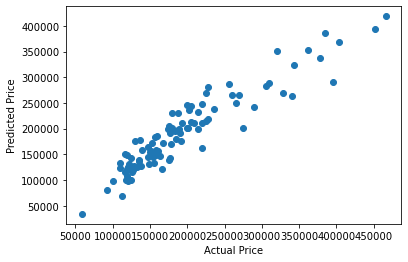

In [8]:
# Here we call the model we created and train it and use it to predict the values
LR_regressor = Linear_Regression()
LR_regressor.train(training_X,training_y)
Y_pred = LR_regressor.predict(val_X)
plt.scatter(val_y , Y_pred)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
print("MAE: ", metrics.mean_absolute_error(val_y,Y_pred))

### Train using the sklearn linear regressor

MAE:  20953.968512202908


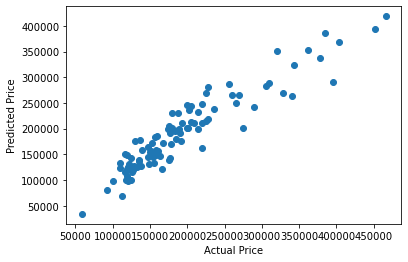

In [9]:
# Here we use the Linear regression model from sklearn to train the model and predict the values
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(training_X,training_y)
prediction = lm.predict(val_X)

plt.scatter(val_y , prediction)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
print("MAE: ", metrics.mean_absolute_error(val_y,prediction))